In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re
import pandas.testing as tm

In [2]:
df = pd.read_csv(r'D:\Masters\DMML\Project\Datasets\vehicles.csv', encoding="ISO-8859-1")

In [3]:
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [4]:
df.dtypes

id                int64
url              object
region           object
region_url       object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
image_url        object
description      object
county          float64
state            object
lat             float64
long            float64
posting_date     object
dtype: object

In [5]:
#removing unwanted columns

In [6]:
df.drop('id',axis=1,inplace = True)
df.drop('url',axis=1,inplace = True)
df.drop('region_url',axis=1,inplace = True)
df.drop('VIN',axis=1,inplace = True)
df.drop('size',axis=1,inplace = True)
df.drop('image_url',axis=1,inplace = True)
df.drop('description',axis=1,inplace = True)
df.drop('lat',axis=1,inplace = True)
df.drop('long',axis=1,inplace = True)
df.drop('posting_date',axis=1,inplace = True)


In [7]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,county,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,NaN,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,NaN,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,NaN,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,NaN,wy


In [8]:
df.dtypes

region           object
price             int64
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer        float64
title_status     object
transmission     object
drive            object
type             object
paint_color      object
county          float64
state            object
dtype: object

In [9]:
df.drop('county',axis=1,inplace = True)

In [10]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [11]:
#Checking for null values and filling the data

In [12]:
df.isnull().sum()

region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
type             92858
paint_color     130203
state                0
dtype: int64

In [13]:
categorical_columns = []
continous_columns = []
discrete_columns = []

for x in df.columns:
  if df[x].dtypes == 'O':
    categorical_columns.append(x)
  else:
    if df[x].nunique()>20:
      continous_columns.append(x)
    else:
      discrete_columns.append(x)

In [14]:
categorical_columns

['region',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'type',
 'paint_color',
 'state']

In [15]:
continous_columns

['price', 'year', 'odometer']

In [16]:
discrete_columns

[]

In [17]:
for x in continous_columns:
  df[x].fillna(df[x].median(),inplace=True)

In [18]:
for x in categorical_columns:
  df[x].fillna(df[x].mode()[0],inplace=True)

In [19]:
df.isna().sum()

region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [20]:
#All the null values were removed 

In [21]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,az
1,fayetteville,11900,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ar
2,florida keys,21000,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,fl
3,worcester / central MA,1500,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ma
4,greensboro,4900,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,white,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.0,clean,other,4wd,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [22]:
df.describe()

,price,year,odometer
count,4.268800e+05,426880.000000,4.268800e+05
mean,7.519903e+04,2011.240173,9.791454e+04
std,1.218228e+07,9.439234,2.127801e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.813000e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.330000e+05
max,3.736929e+09,2022.000000,1.000000e+07


In [23]:
#Now we should remove the outliers

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'odometer'}>, <AxesSubplot:>]],
      dtype=object)

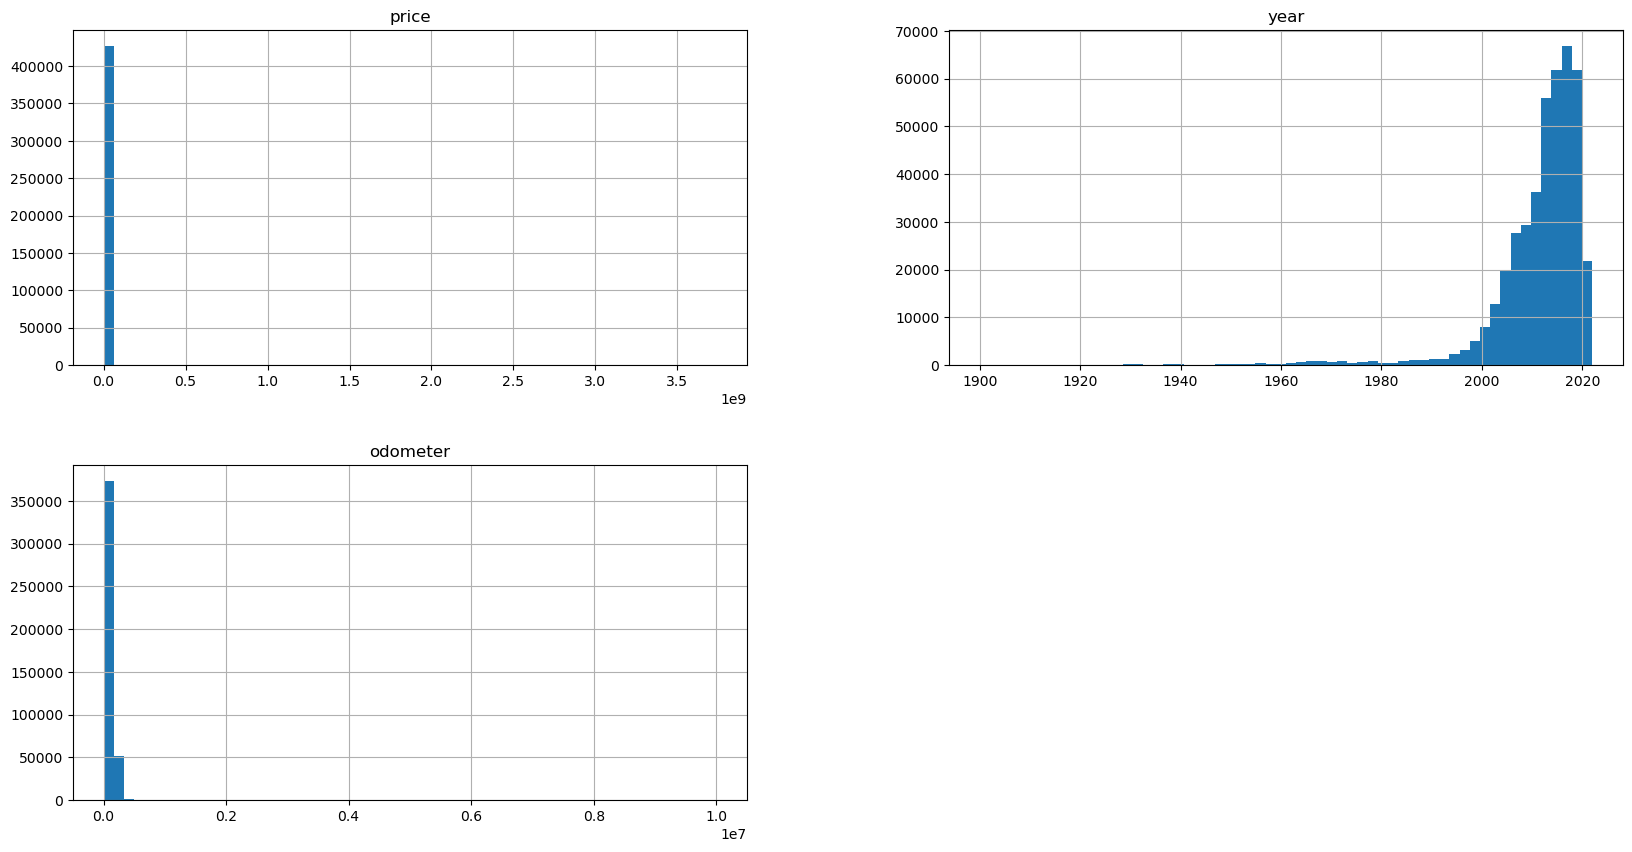

In [24]:
df.hist(bins=60,figsize=(20,10))

In [25]:
df[df.price>40000]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
105,auburn,40590,2019.0,ford,f250 super duty regular cab,good,8 cylinders,other,9313.0,clean,other,4wd,pickup,white,al
107,auburn,43990,2019.0,jeep,wrangler unlimited sahara,good,6 cylinders,gas,4362.0,clean,other,4wd,SUV,black,al
143,auburn,40990,2017.0,jeep,wrangler unlimited rubicon,good,6 cylinders,other,30092.0,clean,other,4wd,other,black,al
158,auburn,52990,2020.0,jaguar,e-pace p300 r-dynamic se,good,6 cylinders,gas,79.0,clean,other,4wd,other,white,al
204,birmingham,58977,2019.0,gmc,sierra 3500,good,6 cylinders,gas,66368.0,clean,automatic,4wd,sedan,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426840,wyoming,65999,2017.0,ford,2017,good,6 cylinders,diesel,73000.0,clean,automatic,4wd,sedan,white,wy
426846,wyoming,41999,2015.0,ford,2015,good,6 cylinders,gas,126000.0,clean,automatic,4wd,sedan,white,wy
426857,wyoming,41990,2019.0,toyota,4runner limited sport,good,6 cylinders,gas,36630.0,clean,other,4wd,SUV,white,wy
426858,wyoming,51990,2020.0,cadillac,xt6 premium luxury,good,6 cylinders,gas,6814.0,clean,other,fwd,other,black,wy


In [26]:
df[df.price<300]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
10,el paso,0,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,tx
11,el paso,0,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,tx
12,el paso,0,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,tx
13,el paso,0,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,tx
14,el paso,0,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,tx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426764,wyoming,0,2018.0,ford,peterbilt 579,good,6 cylinders,diesel,1.0,clean,automatic,4wd,sedan,white,wy
426812,wyoming,0,2006.0,toyota,scion tc,excellent,4 cylinders,gas,195000.0,clean,automatic,fwd,sedan,silver,wy
426832,wyoming,0,2004.0,toyota,prius,excellent,4 cylinders,hybrid,239000.0,clean,automatic,fwd,sedan,blue,wy
426836,wyoming,0,2018.0,ram,2500,excellent,6 cylinders,diesel,20492.0,clean,automatic,4wd,truck,white,wy


In [27]:
df.drop(df[df['price'] > 40000].index, inplace = True)

In [28]:
df.drop(df[df['price'] < 300].index, inplace = True)

In [29]:
df[df.price>40000]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state


In [30]:
df[df.price<300]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state


In [31]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,az
1,fayetteville,11900,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ar
2,florida keys,21000,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,fl
3,worcester / central MA,1500,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ma
4,greensboro,4900,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,white,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.0,clean,other,4wd,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [32]:
df[df.year>2022]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state


In [33]:
df[df.year<1980]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
101,auburn,12990,1968.0,volvo,f-150,good,6 cylinders,gas,99999.0,clean,manual,4wd,sedan,white,al
137,auburn,2500,1966.0,ford,1966 C-30 1 ton,good,6 cylinders,gas,47000.0,clean,manual,rwd,pickup,brown,al
208,birmingham,2500,1976.0,chevrolet,malibu classic,good,6 cylinders,gas,100.0,clean,automatic,4wd,sedan,white,al
210,birmingham,1300,1969.0,mercedes-benz,benz,good,6 cylinders,gas,12774.0,clean,automatic,4wd,sedan,white,al
228,birmingham,5500,1978.0,ford,f-150,good,8 cylinders,gas,239000.0,clean,automatic,4wd,truck,green,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426545,wyoming,14000,1977.0,chevrolet,c20 silverado,excellent,8 cylinders,gas,86225.0,clean,automatic,rwd,pickup,yellow,wy
426567,wyoming,19999,1961.0,chevrolet,apache 10,good,6 cylinders,gas,11619.0,clean,automatic,4wd,sedan,white,wy
426593,wyoming,39900,1971.0,toyota,fj40 land cruiser,good,6 cylinders,gas,42460.0,clean,manual,4wd,sedan,white,wy
426729,wyoming,20000,1951.0,jeep,cj 3a willys,like new,4 cylinders,gas,14409.0,clean,manual,4wd,other,red,wy


In [34]:
df.drop(df[df['year'] > 2022].index, inplace = True)

In [35]:
df.drop(df[df['year'] < 1980].index, inplace = True)

In [36]:
df[df.year>2022]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state


In [37]:
df[df.year<1980]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state


In [38]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,az
1,fayetteville,11900,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ar
2,florida keys,21000,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,fl
3,worcester / central MA,1500,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ma
4,greensboro,4900,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,white,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.0,clean,other,4wd,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


In [39]:
df[df.odometer<1000]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
84,auburn,28990,2020.0,buick,encore gx essence sport,good,6 cylinders,gas,21.0,clean,other,4wd,other,white,al
277,birmingham,31990,2017.0,jeep,wrangler sport s utility 2d,good,6 cylinders,gas,891.0,clean,other,4wd,other,white,al
388,birmingham,26990,2020.0,nissan,frontier,good,6 cylinders,gas,323.0,clean,automatic,rwd,sedan,red,al
414,birmingham,39900,2015.0,lincoln,f-150,good,6 cylinders,gas,51.0,clean,automatic,4wd,sedan,white,al
694,birmingham,3980,2013.0,kia,rio,good,4 cylinders,gas,0.0,clean,manual,fwd,sedan,white,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426423,wyoming,4200,1994.0,ford,ranger,fair,6 cylinders,gas,500.0,clean,automatic,4wd,sedan,white,wy
426466,wyoming,25550,2019.0,nissan,frontier 4x4,good,6 cylinders,gas,39.0,rebuilt,automatic,4wd,truck,white,wy
426682,wyoming,17873,2018.0,ford,Thunder Creek Fuel Trailer MT2,good,6 cylinders,gas,501.0,clean,automatic,4wd,other,custom,wy
426714,wyoming,33950,2019.0,ford,mustang,like new,4 cylinders,gas,300.0,clean,automatic,4wd,convertible,blue,wy


In [40]:
df[df.odometer>200000]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
119,auburn,17500,2008.0,toyota,fj cruiser,good,6 cylinders,gas,201300.0,clean,manual,4wd,offroad,black,al
138,auburn,4000,2006.0,jeep,grand cherokee laredo,good,6 cylinders,gas,281000.0,clean,automatic,rwd,SUV,black,al
185,birmingham,1800,1998.0,toyota,rav4,good,4 cylinders,gas,240537.0,clean,manual,4wd,sedan,green,al
192,birmingham,3950,2008.0,kia,spectra ex,excellent,4 cylinders,gas,247377.0,clean,automatic,4wd,sedan,white,al
193,birmingham,5900,1998.0,ford,f150,excellent,8 cylinders,gas,214000.0,clean,automatic,4wd,truck,red,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426671,wyoming,9900,2005.0,chevrolet,2500 ls,good,6 cylinders,diesel,291137.0,clean,automatic,4wd,sedan,white,wy
426689,wyoming,1800,1997.0,toyota,4runner,good,6 cylinders,gas,239000.0,clean,automatic,rwd,SUV,white,wy
426690,wyoming,6500,2002.0,ford,f 350,good,6 cylinders,diesel,295000.0,clean,manual,4wd,sedan,white,wy
426779,wyoming,5995,2004.0,chevrolet,colorado,good,5 cylinders,gas,233011.0,clean,manual,4wd,truck,white,wy


In [41]:
df.drop(df[df['odometer'] > 200000].index, inplace = True)

In [42]:
df.drop(df[df['odometer'] < 1000 ].index, inplace = True)

In [43]:
df[df.odometer<1000]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state


In [44]:
df[df.odometer>200000]

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state


In [45]:
df

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state
0,prescott,6000,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,az
1,fayetteville,11900,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ar
2,florida keys,21000,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,fl
3,worcester / central MA,1500,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,ma
4,greensboro,4900,2013.0,ford,f-150,good,6 cylinders,gas,85548.0,clean,automatic,4wd,sedan,white,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,white,wy
426876,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,6 cylinders,gas,12029.0,clean,other,fwd,sedan,red,wy
426877,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,6 cylinders,diesel,4174.0,clean,other,4wd,hatchback,white,wy
426878,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver,wy


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'odometer'}>, <AxesSubplot:>]],
      dtype=object)

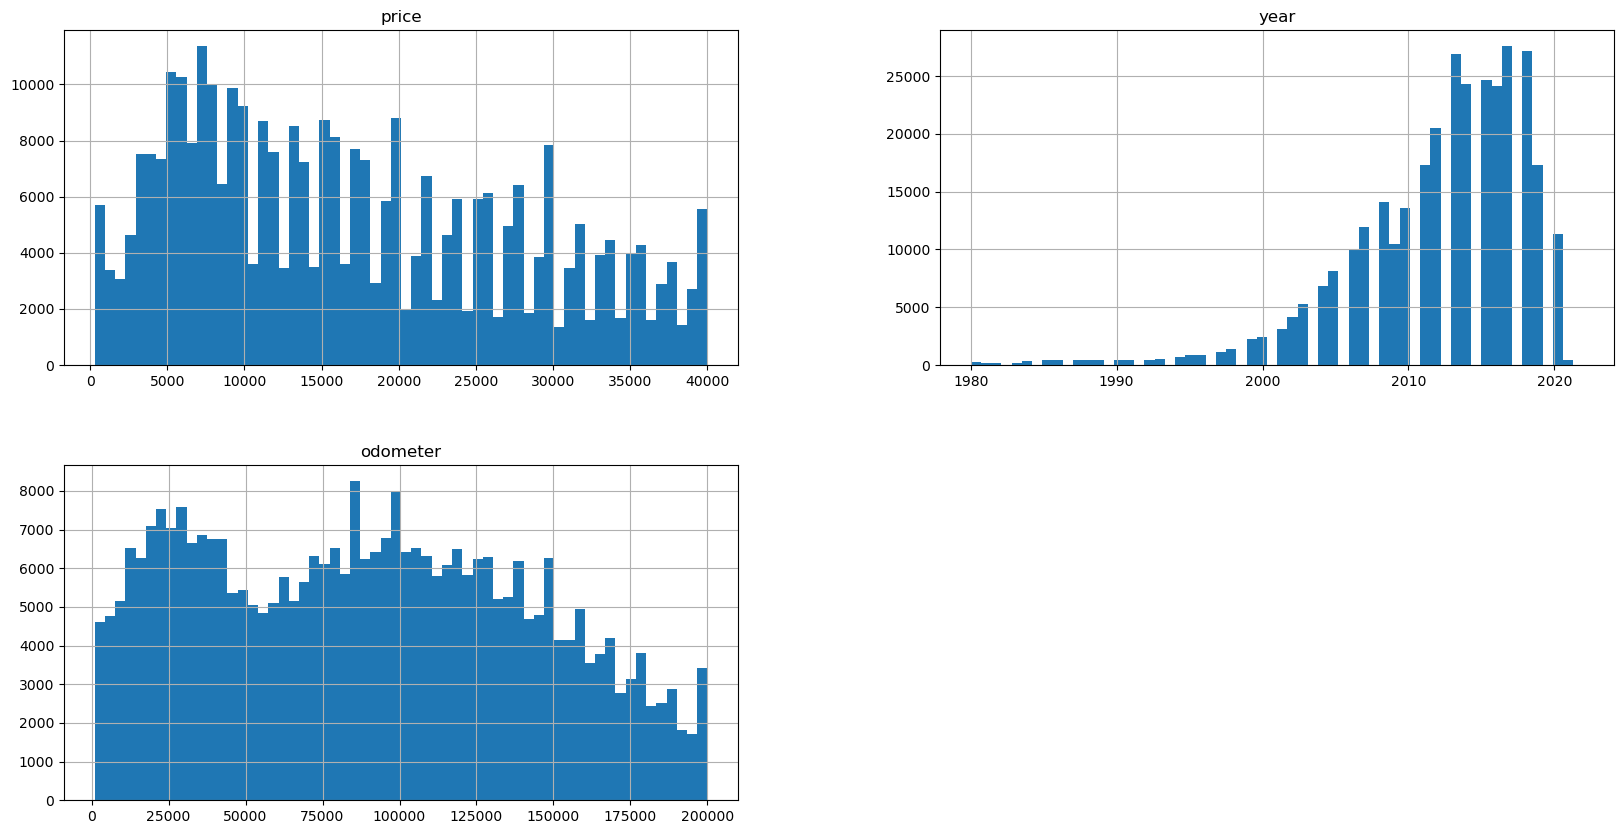

In [46]:
df.hist(bins=60,figsize=(20,10))

In [47]:
df.to_csv(r'D:\Masters\DMML\Project\Datasets\US cleaned.csv', index = False)